In [2]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig

In [6]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


True
0
NVIDIA GeForce RTX 4090 Laptop GPU


In [3]:
df1 = pd.read_csv('cooling_system.csv')

In [8]:
df1.head()

,Unnamed: 0,64817-1598,65263-111,65262-110
0,2,4096.0,50.0,88.0
1,3,4096.0,50.0,89.0
2,4,4096.0,50.0,89.0
3,5,4096.0,50.0,87.0
4,6,4096.0,50.0,87.0


In [4]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1.reset_index(inplace=True)

In [5]:
df1.shape

(92560, 4)

In [11]:
seq_len = 64 
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=2,                       #was 4
    feature_num_units=100,                      #was 50
    feature_noise_dim=10,
    batch_size=256,
    epochs=10000,  # For real data sets, 100-1000 epochs is typical     #was 5k
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['64817-1598', '65263-111', '65262-110'],
)

2024-05-13 09:15:09,178 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 64!
2024-05-13 09:15:13,350 : MainThread : INFO : epoch: 0
2024-05-13 09:15:14,930 : MainThread : INFO : epoch: 1
2024-05-13 09:15:15,098 : MainThread : INFO : epoch: 2
2024-05-13 09:15:15,261 : MainThread : INFO : epoch: 3
2024-05-13 09:15:15,420 : MainThread : INFO : epoch: 4
2024-05-13 09:15:15,606 : MainThread : INFO : epoch: 5
2024-05-13 09:15:15,819 : MainThread : INFO : epoch: 6
2024-05-13 09:15:16,002 : MainThread : INFO : epoch: 7
2024-05-13 09:15:16,254 : MainThread : INFO : epoch: 8
2024-05-13 09:15:16,479 : MainThread : INFO : epoch: 9
2024-05-13 09:15:16,685 : MainThread : INFO : epoch: 10
2024-05-13 09:15:16,880 : MainThread : INFO : epoch: 11
2024-05-13 09:15:17,061 : MainThread : INFO : epoch: 12
2024-05-13 09:15:17,245 : MainThread : INFO : epoch: 13
2024-05-13 09:15:17,440 : MainThread : INFO : epoch: 14
2024-05-13 09:15:17,719 : MainThre

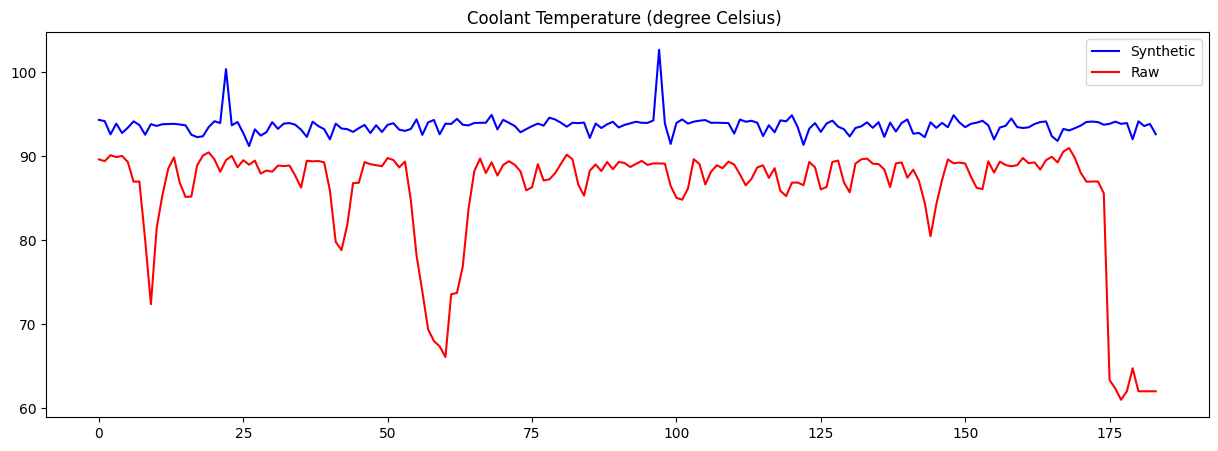

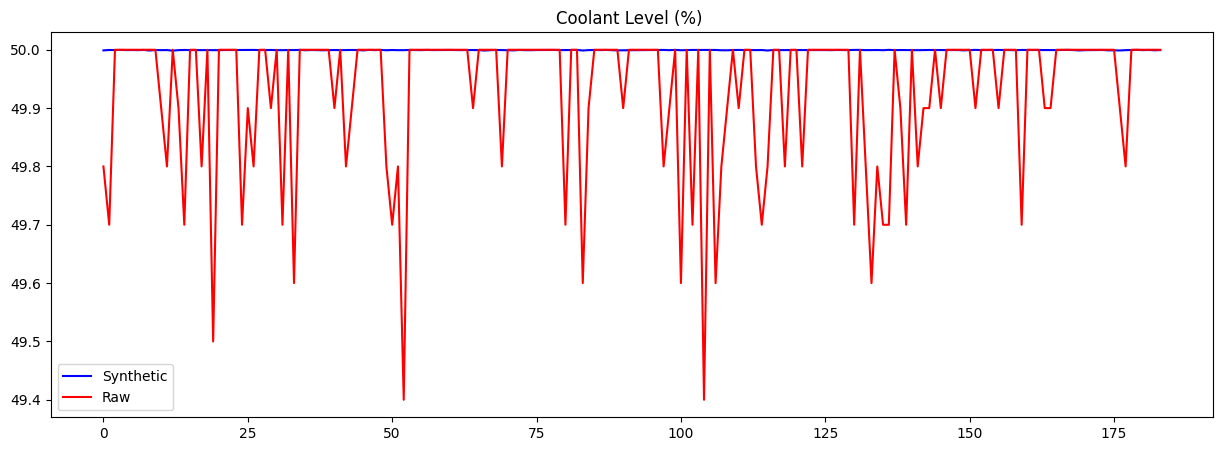

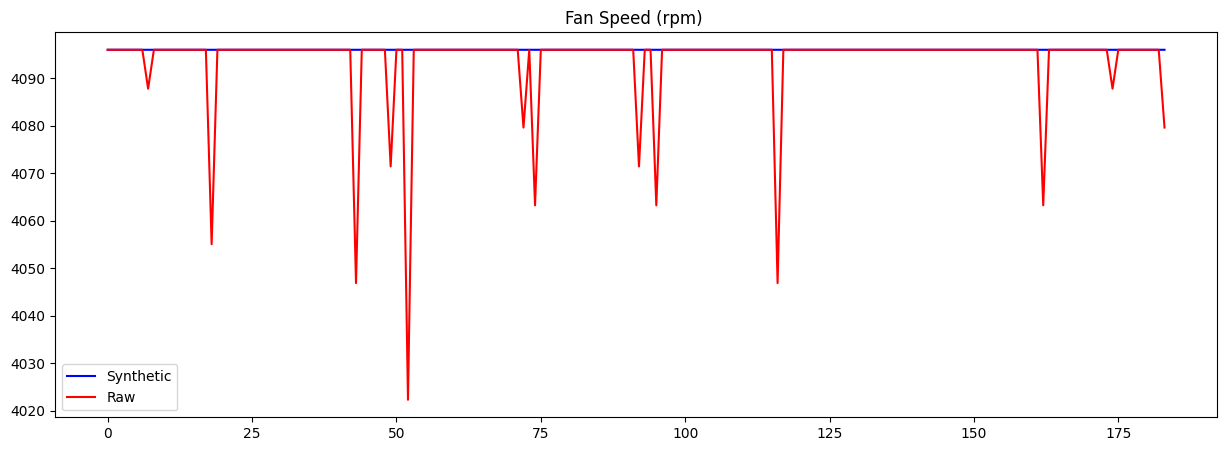

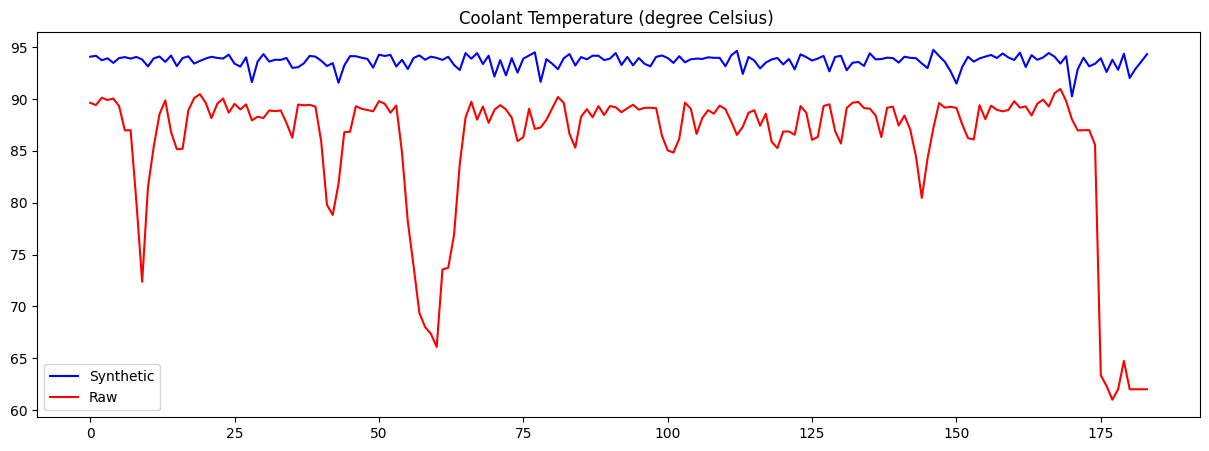

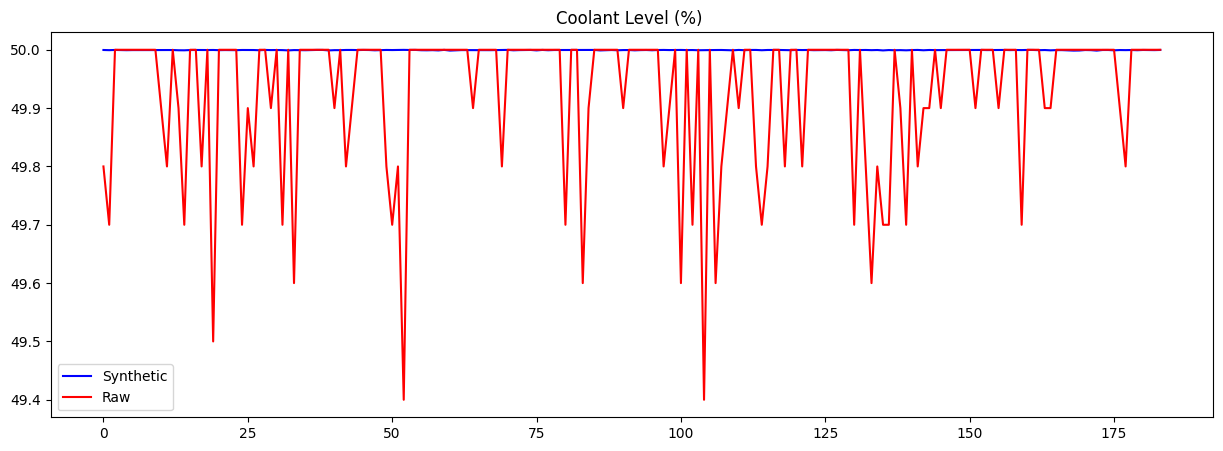

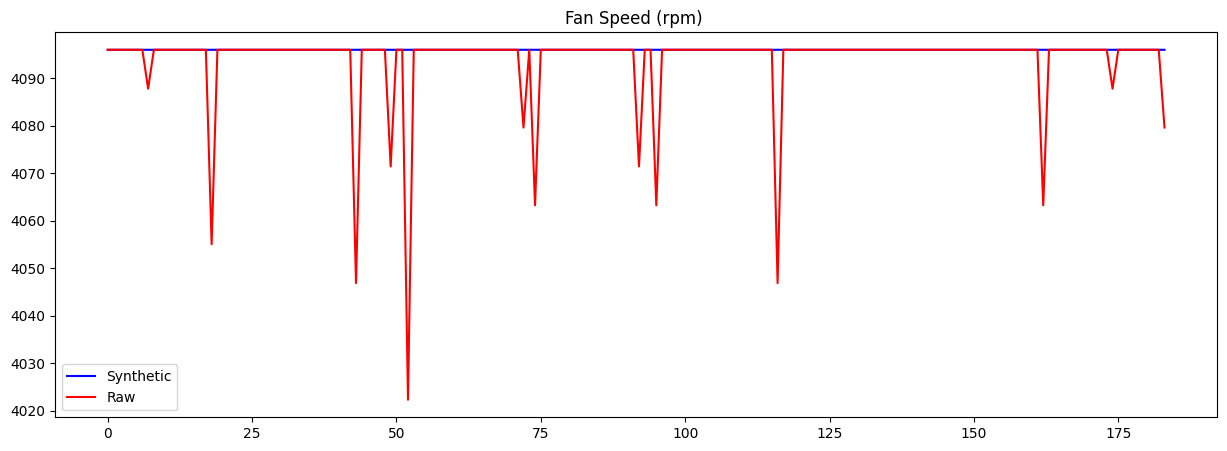

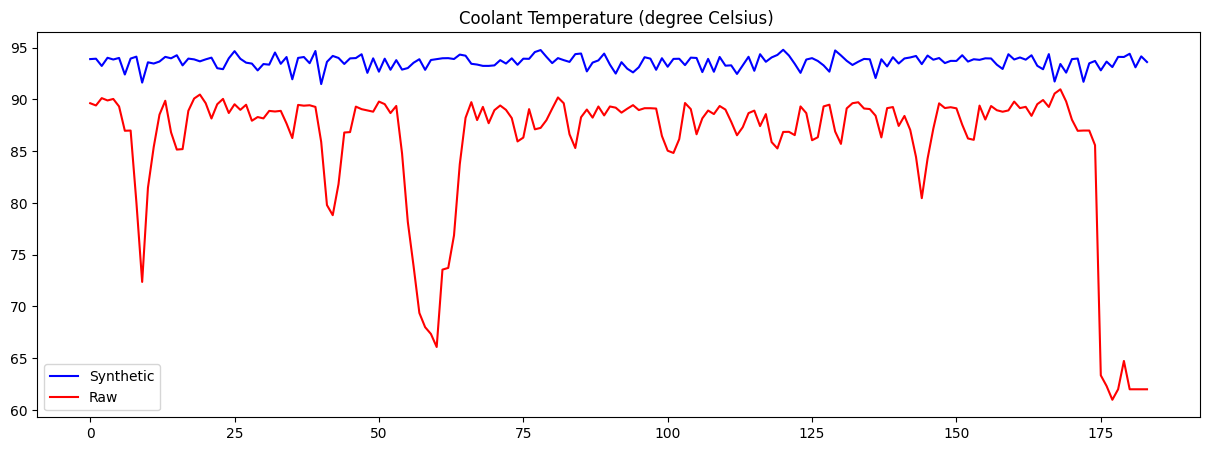

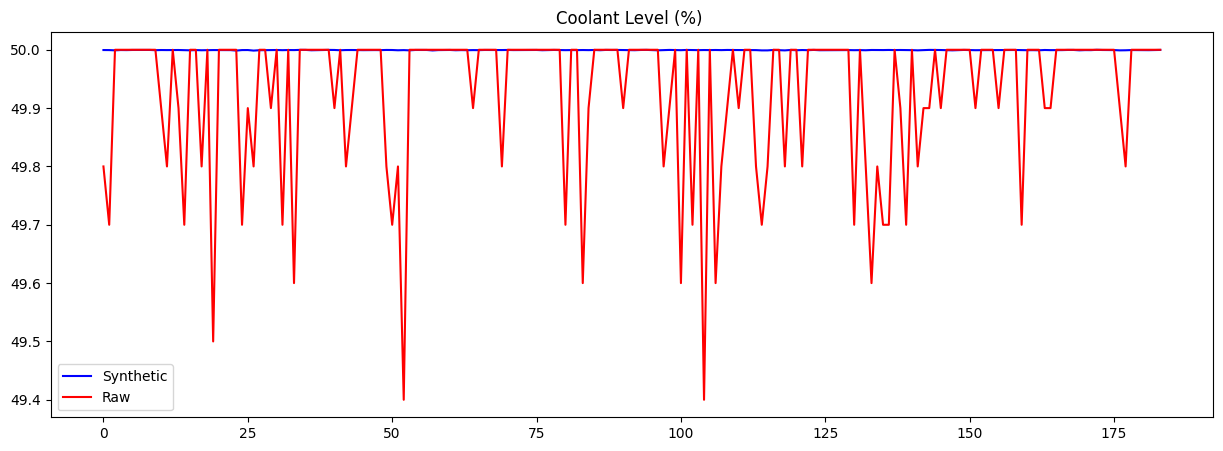

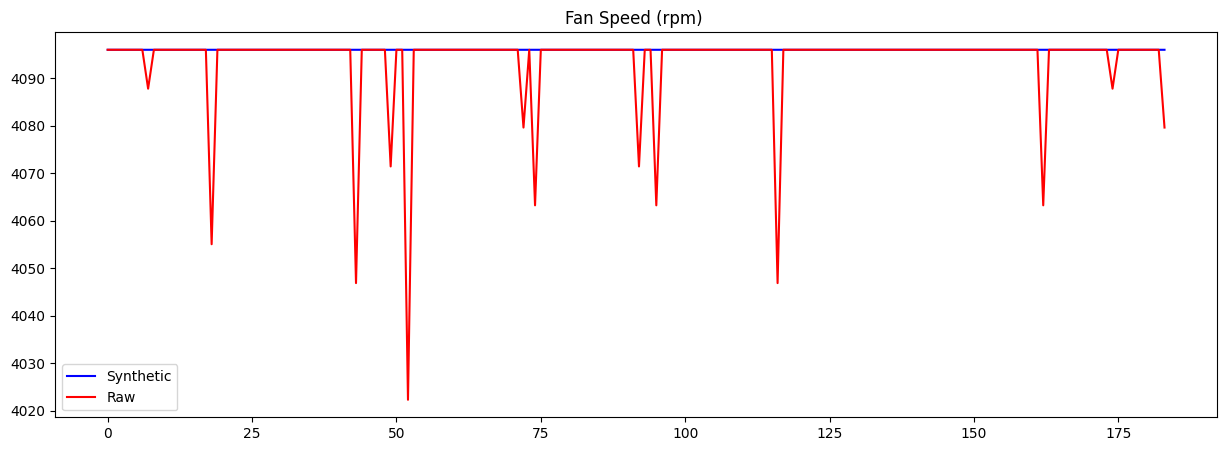

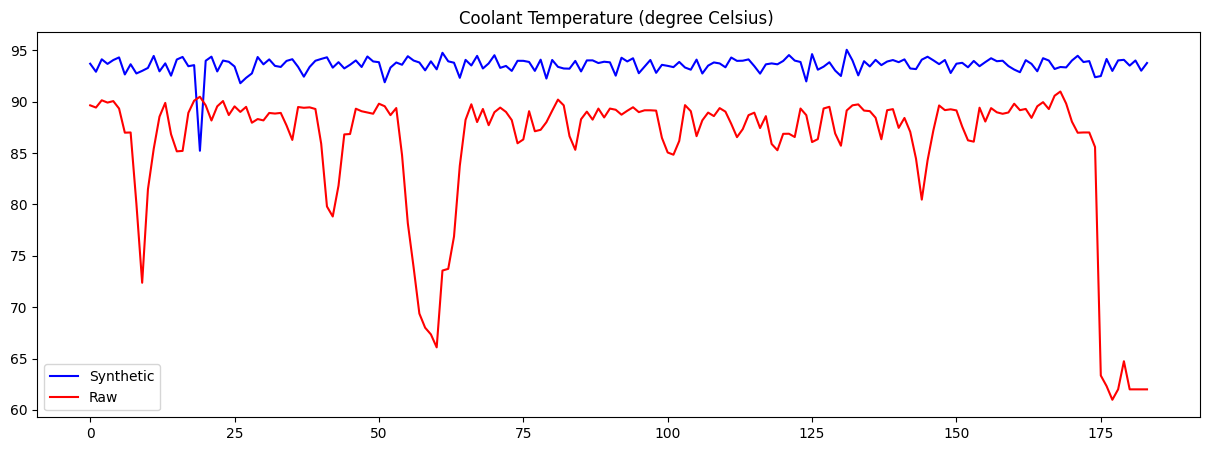

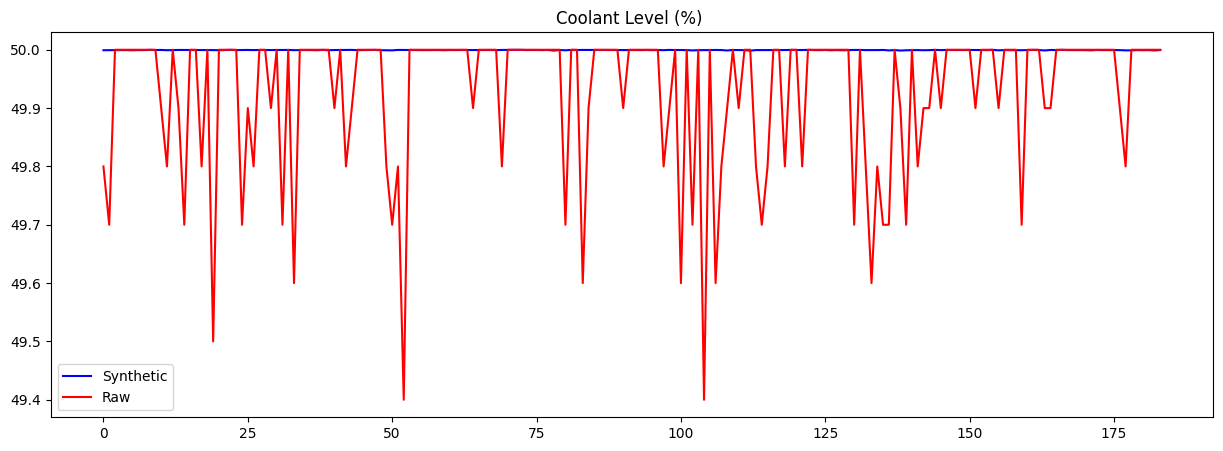

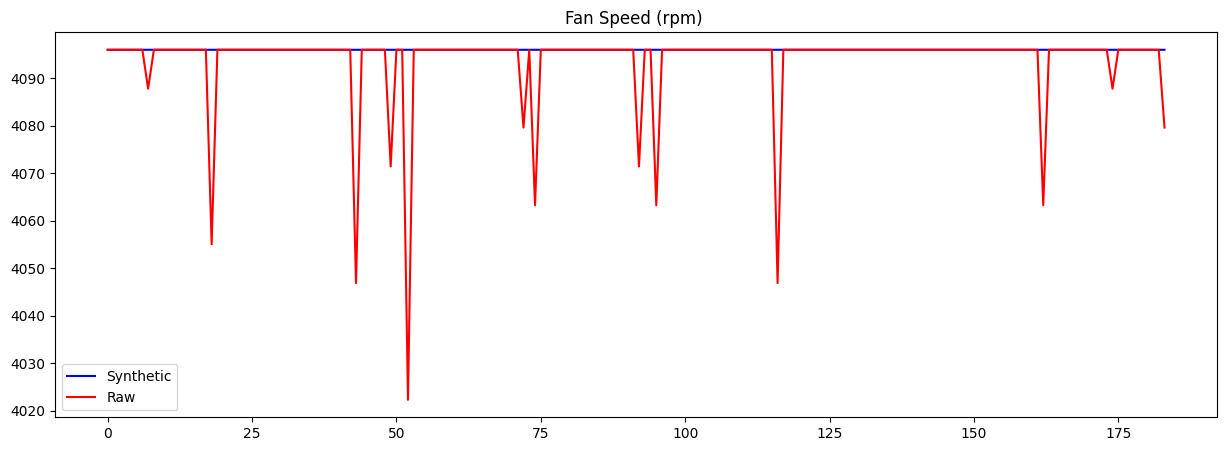

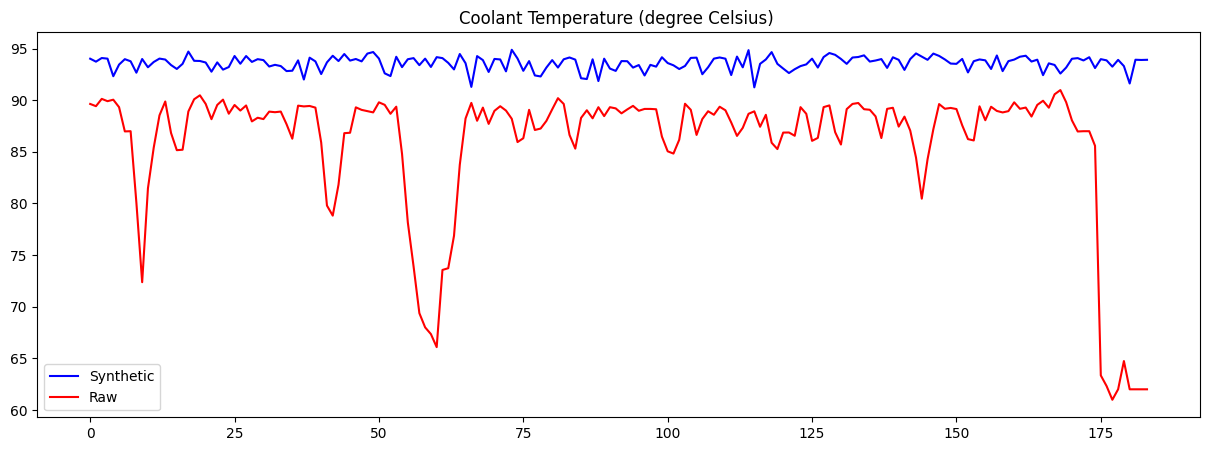

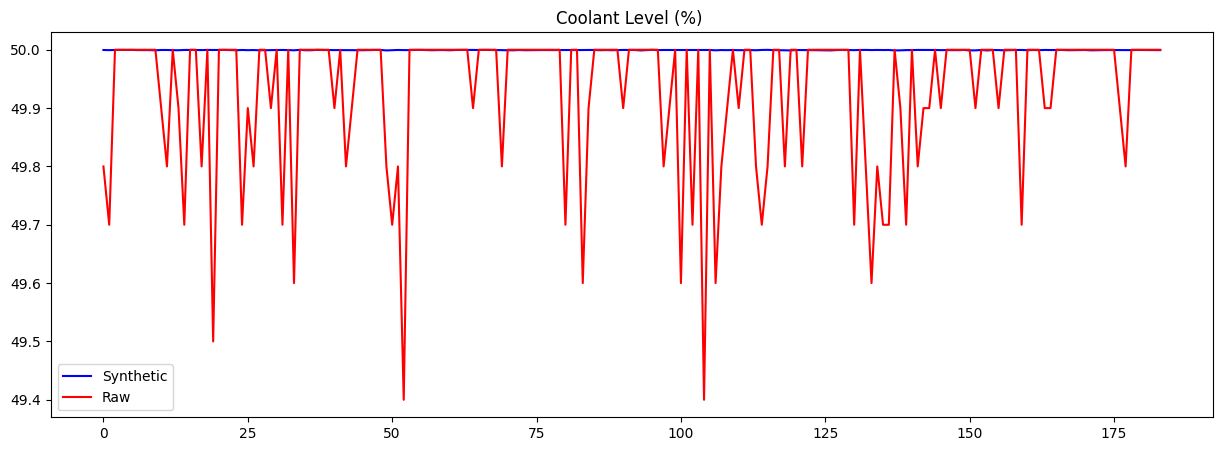

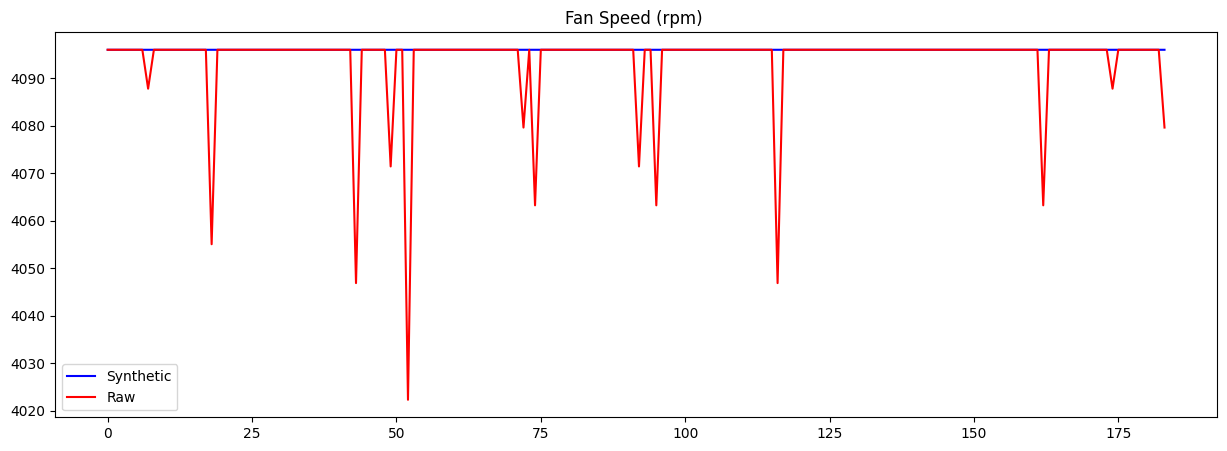

In [12]:
df = df1.copy()
path = ''
for i in range(40):
    #name = path+"\\synthetic_engine_"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    if i % 8 == 0:
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Coolant Temperature (degree Celsius) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Coolant Level (%) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Fan Speed (rpm) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()

    #synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [6]:
sdf = pd.read_csv(r'Generated_cooling_sys\synthetic_cooling+32.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [17]:
sdf.head()

,65262-110,65263-111,64817-1598
0,93.494354,49.531790,4095.0590
1,93.503720,49.531600,4095.0570
2,93.503750,49.531600,4095.0570
3,93.503750,49.531600,4095.0570
4,93.503720,49.531605,4095.0571


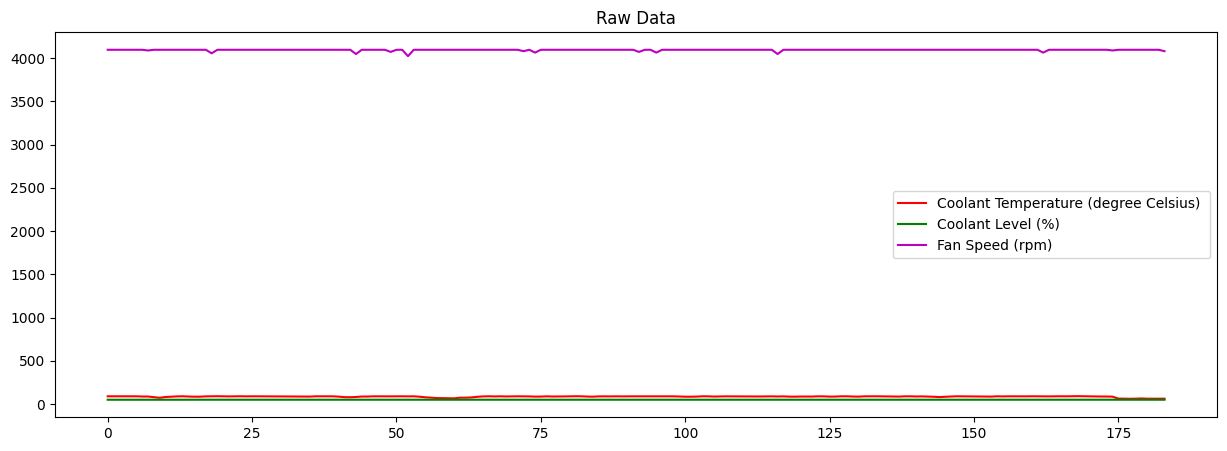

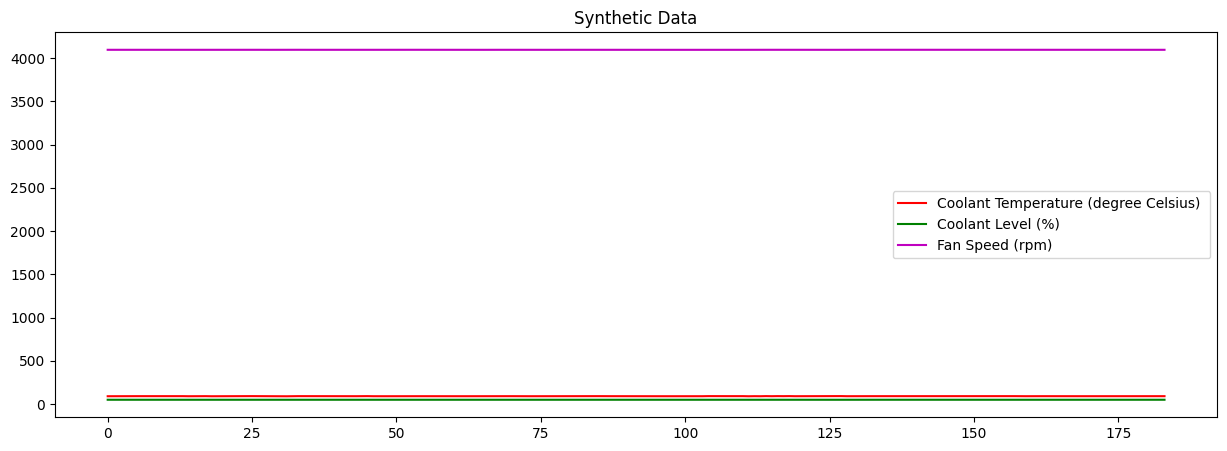

In [18]:
w=500
plt.figure(figsize=(15,5))
v2 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('Raw Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Coolant Temperature (degree Celsius) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Coolant Level (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Fan Speed (rpm) ')
plt.legend()
plt.figure(figsize=(15,5))
v2 = sdf['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('Synthetic Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Coolant Temperature (degree Celsius) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Coolant Level (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Fan Speed (rpm) ')
plt.legend()
plt.show()


In [19]:
df1.corr()

,index,64817-1598,65263-111,65262-110
index,1.000000,0.005663,0.004914,-0.217016
64817-1598,0.005663,1.000000,-0.000882,-0.003703
65263-111,0.004914,-0.000882,1.000000,-0.008335
65262-110,-0.217016,-0.003703,-0.008335,1.000000


In [20]:
sdf.corr()

,65262-110,65263-111,64817-1598
65262-110,1.000000,-0.080666,0.061241
65263-111,-0.080666,1.000000,0.469184
64817-1598,0.061241,0.469184,1.000000


In [21]:
df1.describe()

,index,64817-1598,65263-111,65262-110
count,92560.000000,92560.000000,92560.000000,92560.000000
mean,46279.500000,4093.787381,49.928155,85.698293
std,26719.914795,95.173993,1.893975,7.293150
min,0.000000,0.000000,0.000000,-40.000000
25%,23139.750000,4096.000000,50.000000,86.000000
50%,46279.500000,4096.000000,50.000000,88.000000
75%,69419.250000,4096.000000,50.000000,90.000000
max,92559.000000,4096.000000,50.000000,94.000000


In [22]:
sdf.describe()

,65262-110,65263-111,64817-1598
count,92544.000000,92544.000000,92544.000000
mean,90.958613,49.821798,4095.646242
std,1.414631,0.331066,0.518652
min,86.577194,47.401848,4092.109400
25%,89.938126,49.796368,4095.529500
50%,90.839420,49.995106,4095.858400
75%,91.928510,49.999992,4095.966000
max,95.259660,50.000000,4096.000000


In [7]:
def moving_avg(x, N=1000):          #function to compute moving average
    return np.convolve(x, np.ones((N,))/N, mode='valid')

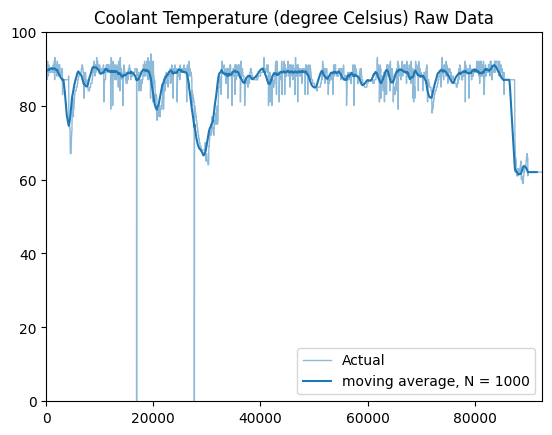

In [8]:

plt.plot(df1['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['65262-110']))
plt.title('Coolant Temperature (degree Celsius) Raw Data')
plt.ylim(0,100)
plt.legend()
plt.show()


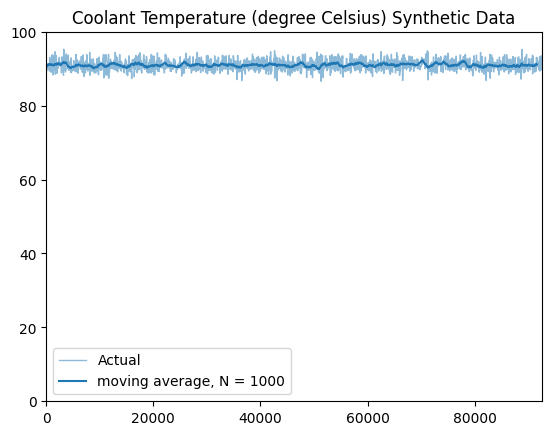

In [9]:
plt.plot(sdf['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['65262-110']))
plt.title('Coolant Temperature (degree Celsius) Synthetic Data')
plt.ylim(0,100)
plt.legend()
plt.show()

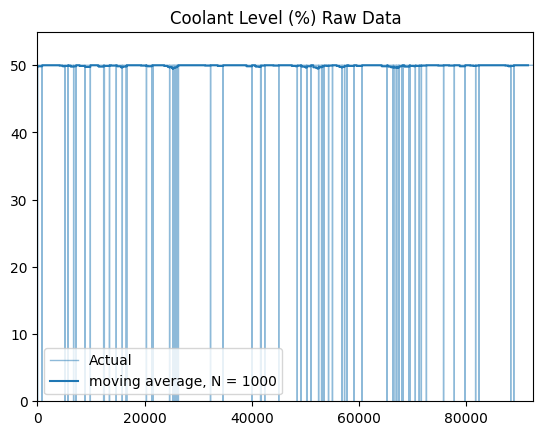

In [10]:
plt.plot(df1['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['65263-111']))
plt.title('Coolant Level (%) Raw Data')
plt.ylim(0,55)
plt.legend()
plt.show()

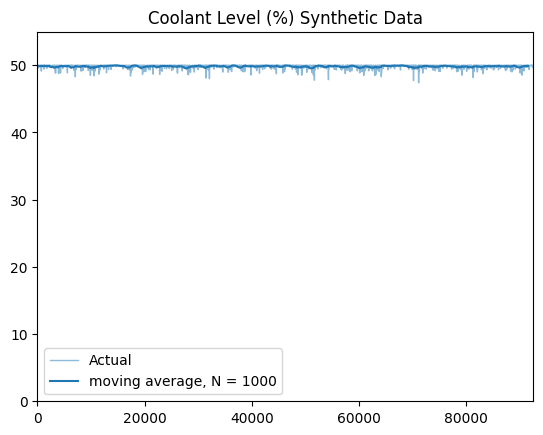

In [11]:
plt.plot(sdf['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['65263-111']))
plt.ylim(0,55)
plt.title('Coolant Level (%) Synthetic Data')
plt.legend()
plt.show()

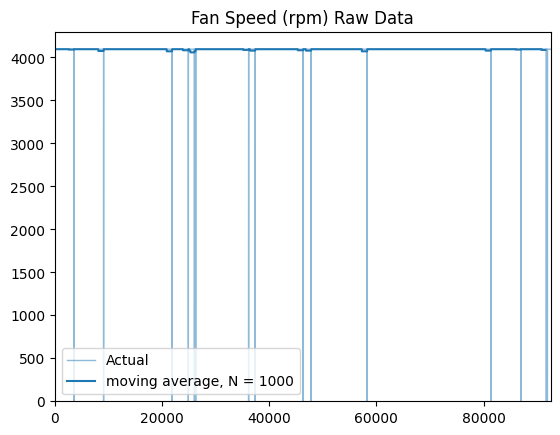

In [15]:
plt.plot(df1['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['64817-1598']))
plt.title('Fan Speed (rpm) Raw Data')
plt.ylim(0,4300)
plt.legend()
plt.show()

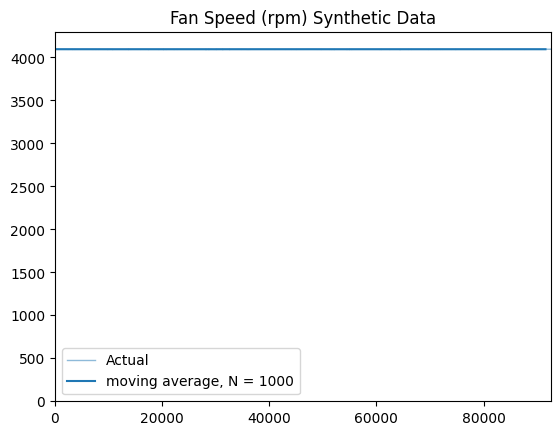

In [16]:
plt.plot(sdf['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['64817-1598']))
plt.title('Fan Speed (rpm) Synthetic Data')
plt.ylim(0,4300)
plt.legend()
plt.show()

In [17]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)